In [1]:
library(tidyverse)
library(readxl)
install.packages("rio")
library(rio)
install.packages("infer")
library(infer)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
#loading data
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
credit_card_data <- rio::import(file = url, skip =1)

# url <- "https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients?fbclid=IwAR3zj19Vq3zUk-QZaKzZDGcghVgblSfERm7w8v76w8BzqHQd3PBthNleueI"
# credit_card_data <- read_excel("default_credit_cards.xlsx")

 head(credit_card_data)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,⋯,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,20000,2,2,1,24,2,2,-1,-1,⋯,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,⋯,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,⋯,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,⋯,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,⋯,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,6,50000,1,1,2,37,0,0,0,0,⋯,19394,19619,20024,2500,1815,657,1000,1000,800,0


In [3]:
#cleaning data
credit_card_clean <- credit_card_data %>%
                     mutate(education_level=as.character(`EDUCATION`)) %>%
                     mutate(default=as.character(`default payment next month`)) %>%
                     select(education_level, default) %>% 
                     mutate(education_level = replace(education_level, education_level == "2", "University"),
                            default = replace(default, default== "1", "Yes")) %>%
                     mutate(education_level = replace(education_level, education_level == "3", "High School"),
                            default = replace(default, default== "0", "No"))%>%
                    filter(education_level == 'University' | education_level == 'High School')%>%
mutate(education_level = as_factor(education_level),
       default = as_factor(default))
head(credit_card_clean)


,education_level,default
,<fct>,<fct>
1,University,Yes
2,University,Yes
3,University,No
4,University,No
5,University,No
6,University,No


`summarise()` has grouped output by 'education_level'. You can override using
the `.groups` argument.


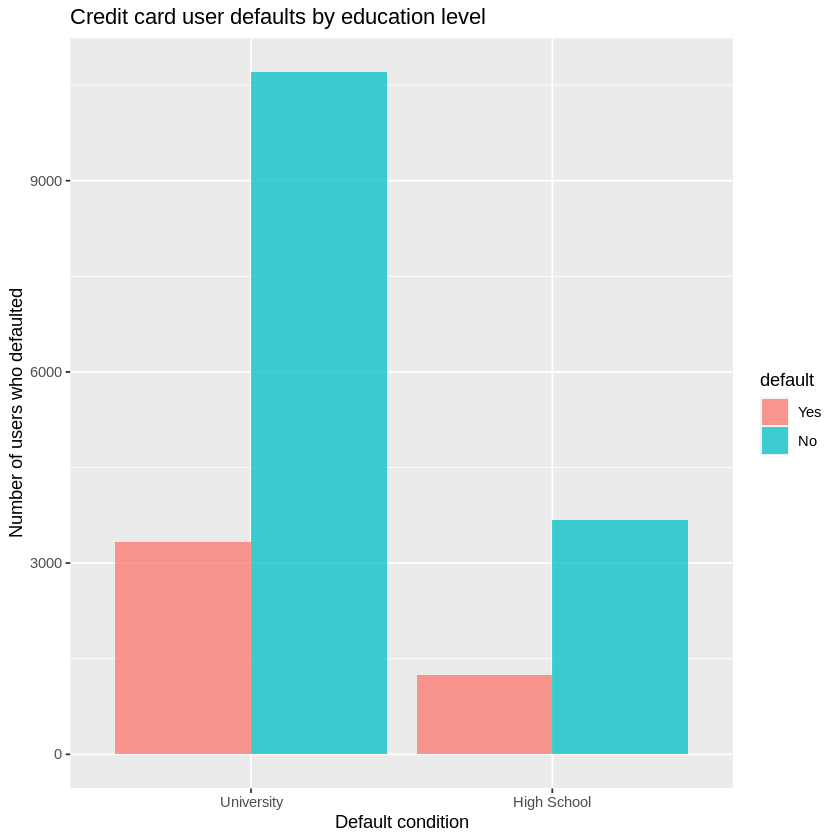

In [4]:
credit_card_count <- credit_card_clean %>%
                        group_by(education_level, default)%>%
                        summarise(count=n()) 

credit_card_plot <- credit_card_count %>%
                    ggplot(aes(x=education_level, y=count, fill=default))+
                    geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)+
                    ggtitle("Credit card user defaults by education level") +
                    labs(x="Default condition", y="Number of users who defaulted")

credit_card_plot

In [5]:
credit_card_matrix <- credit_card_count %>%
                        dcast(education_level~default, value.var="count") %>%
                        mutate(default = percent(Yes/(Yes+No)), no_default = percent(No/(Yes+No))) %>%
                        select(education_level, default, no_default)
credit_card_matrix

ERROR: Error in dcast(., education_level ~ default, value.var = "count"): could not find function "dcast"
